## Importing the Data

In [1]:
import time
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("train.csv")
display(train)

test = pd.read_csv("test.csv")
display(test)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


### Eliminating Duplicates

In [2]:
duplicates = pd.concat(x for _, x in train.groupby(["text"]) if len(x) > 1)
with pd.option_context("display.max_rows", None, "max_colwidth", 240):
    display(duplicates[["id", "target", "text"]])

,id,target,text
4290,6094,0,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect
4299,6105,0,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect
4312,6123,1,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect
6363,9095,1,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_
6366,9098,1,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_
6373,9107,1,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_
6377,9113,1,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_
6378,9114,1,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_
6392,9135,1,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_
2822,4057,1,#KCA #VoteJKT48ID 12News: UPDATE: A family of 3 has been displaced after fired damaged housed near 90th and Osborn. Fire extinguished no iÛ_


In [3]:
train.drop(
    [
        6449, 7034, 3589, 3591, 3597, 3600, 3603,
        3604, 3610, 3613, 3614, 119, 106, 115,
        2666, 2679, 1356, 7609, 3382, 1335, 2655,
        2674, 1343, 4291, 4303, 1345, 48, 3374,
        7600, 164, 5292, 2352, 4308, 4306, 4310,
        1332, 1156, 7610, 2441, 2449, 2454, 2477,
        2452, 2456, 3390, 7611, 6656, 1360, 5771,
        4351, 5073, 4601, 5665, 7135, 5720, 5723,
        5734, 1623, 7533, 7537, 7026, 4834, 4631,
        3461, 6366, 6373, 6377, 6378, 6392, 2828,
        2841, 1725, 3795, 1251, 7607
    ], inplace=True
)
duplicates = pd.concat(x for _, x in train.groupby(["text"]) if len(x) > 1)
with pd.option_context("display.max_rows", None, "max_colwidth", 240):
    display(duplicates[["id", "target", "text"]])

,id,target,text
4290,6094,0,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect
4299,6105,0,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect
4312,6123,1,#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect
4221,5996,1,#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption
4239,6023,1,#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption
4244,6031,0,#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption
2830,4068,1,.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4
2831,4072,1,.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4
2832,4076,0,.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4
2833,4077,1,.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4


In [4]:
train.drop(
    [
        4290, 4299, 4312, 4221, 4239, 4244, 2830,
        2831, 2832, 2833, 4597, 4605, 4618, 4232,
        4235, 3240, 3243, 3248, 3251, 3261, 3266,
        4285, 4305, 4313, 1214, 1365, 6614, 6616,
        1197, 1331, 4379, 4381, 4284, 4286, 4292,
        4304, 4309, 4318, 610, 624, 630, 634, 3985,
        4013, 4019, 1221, 1349, 6091, 6094,
        6103, 6123, 5620, 5641
    ], inplace=True
)

### Keyword and Location Normalization

In [5]:
from gensim.parsing.preprocessing import stem_text

def clean_location_keyword(df):
    df["location"] = df["location"].astype("string").str.lower()
    df["location"].fillna("<empty>", inplace=True)
    df["keyword"] = df["keyword"].astype("string").str.lower()
    df["keyword"].replace(regex=r"\%20", value=" ", inplace=True)
    df["keyword"].fillna("<empty>", inplace=True)
    df["keyword"] = df["keyword"].apply(stem_text)

clean_location_keyword(train)
clean_location_keyword(test)

## Looking at Class Imbalance

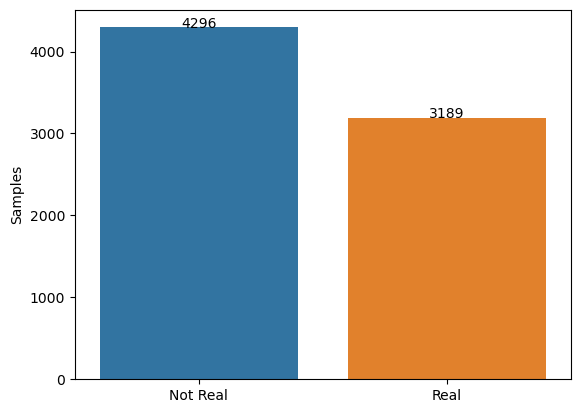

In [6]:
counts = pd.DataFrame(train["target"].value_counts())
counts.rename(columns={"target": "Samples"}, index={0: "Not Real", 1: "Real"}, inplace=True)
ax = sns.barplot(x=counts.index, y=counts.Samples)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x()+(p.get_width()/2),
        y=height,
        s=round(height),
        ha="center"
    )

## Looking at Keywords

In [7]:
with pd.option_context("display.max_rows", None):
    display(train["keyword"].unique())

array(['<empty>', 'ablaz', 'accid', 'aftershock', 'airplan accid',
       'ambul', 'annihil', 'apocalyps', 'armageddon', 'armi', 'arson',
       'arsonist', 'attack', 'avalanch', 'battl', 'bioterror', 'blaze',
       'bleed', 'blew up', 'blight', 'blizzard', 'blood', 'bloodi',
       'blown up', 'bodi bag', 'bomb', 'bridg collaps', 'build burn',
       'build on fire', 'burn', 'burn build', 'bush fire', 'casualti',
       'catastroph', 'chemic emerg', 'cliff fall', 'collaps', 'collid',
       'collis', 'crash', 'crush', 'curfew', 'cyclon', 'damag', 'danger',
       'dead', 'death', 'debri', 'delug', 'demolish', 'demolit', 'derail',
       'desol', 'destroi', 'destruct', 'deton', 'devast', 'disast',
       'displac', 'drought', 'drown', 'dust storm', 'earthquak',
       'electrocut', 'emerg', 'emerg plan', 'emerg servic', 'engulf',
       'epicentr', 'evacu', 'explod', 'explos', 'eyewit', 'famin',
       'fatal', 'fear', 'fire', 'fire truck', 'first respond', 'flame',
       'flatten', 

In [8]:
def collapse_keywords(x):
    if x == "arsonist":
        return "arson"
    if x == "blaze":
        return "ablaz"
    if x == "bloodi":
        return "blood"
    if x == "build burn" or x == "burn build":
        return "build on fire"
    if x == "blew up":
        return "blown up"
    if x == "colli":
        return "collid"
    if x == "explo":
        return "explod"
    if x == "hailstorm":
        return "hail"
    if x == "injuri":
        return "injur"
    if x == "panick":
        return "panic"
    if x == "suicid bomber":
        return "suicid bomb"
    if x == "wildfir":
        return "wild fire"
    return x

train["keyword"] = train["keyword"].apply(lambda x: collapse_keywords(x))
test["keyword"] = test["keyword"].apply(lambda x: collapse_keywords(x))
with pd.option_context("display.max_rows", None):
    display(train["keyword"].unique())

array(['<empty>', 'ablaz', 'accid', 'aftershock', 'airplan accid',
       'ambul', 'annihil', 'apocalyps', 'armageddon', 'armi', 'arson',
       'attack', 'avalanch', 'battl', 'bioterror', 'bleed', 'blown up',
       'blight', 'blizzard', 'blood', 'bodi bag', 'bomb', 'bridg collaps',
       'build on fire', 'burn', 'bush fire', 'casualti', 'catastroph',
       'chemic emerg', 'cliff fall', 'collaps', 'collid', 'collis',
       'crash', 'crush', 'curfew', 'cyclon', 'damag', 'danger', 'dead',
       'death', 'debri', 'delug', 'demolish', 'demolit', 'derail',
       'desol', 'destroi', 'destruct', 'deton', 'devast', 'disast',
       'displac', 'drought', 'drown', 'dust storm', 'earthquak',
       'electrocut', 'emerg', 'emerg plan', 'emerg servic', 'engulf',
       'epicentr', 'evacu', 'explod', 'explos', 'eyewit', 'famin',
       'fatal', 'fear', 'fire', 'fire truck', 'first respond', 'flame',
       'flatten', 'flood', 'forest fire', 'hail', 'harm', 'hazard',
       'heat wave', 'hellfi

In [9]:
with pd.option_context("display.max_rows", None):
    display(pd.DataFrame(data=train[["id", "keyword", "target"]].groupby(["keyword", "target"]).count()).rename(columns={"id": "count"}).head(50))

count
keyword       target       
<empty>       0          19
              1          37
ablaz         0          88
              1          19
accid         0          11
              1          24
aftershock    0          31
airplan accid 0           5
              1          29
ambul         0          18
              1          20
annihil       0          42
              1          21
apocalyps     0          23
              1           9
armageddon    0          37
              1           5
armi          0          29
              1           5
arson         0          36
              1          30
attack        0          25
              1          46
avalanch      0          26
              1           4
battl         0          21
              1           5
bioterror     0          22
              1          41
bleed         0          30
              1           5
blight        0          30
              1           2
blizzard      0          33
              1           4
blood         0          62
              1           8
blown up      0          59
              1           7
bodi bag      0         100
              1           7
bomb          0          40
              1          60
bridg collaps 0           6
              1          29
build on fire 0          28
              1          64
burn          0          50
              1          17
bush fire     0           7

## Looking at Location

In [10]:
print([location for location in train["location"]][:500])

['<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', '<empty>', 'birmingham', 'est. september 2012 - bristol', 'africa', 'philadelphia, pa', 'london, uk', 'pretoria', 'world wide!!', '<empty>', 'paranaque city', 'live on webcam', '<empty>', 'milky way', '<empty>', '<empty>', '<empty>', 'greensboro,north carolina', '<empty>', 'england.', 'sheffield township, ohio', 'india', 'barbados', 'anaheim', 'abuja', 'usa', 'south africa', 'sao paulo, brazil', 'hollywoodland ', 'edmonton, alberta - treaty 6', '<empty>', 'inang pamantasan', 'twitter lockout in progress', 'concord, ca', 'calgary, ab', 'birmingham', 'san francisco', 'clvlnd', 'nashville, tn', 'santa clara, ca', 'uk', 'st. louis, mo', 'walker county, alabama', 'a

In [11]:
import re

from pycountry import subdivisions

def clean_state_country(df):
    subs = [subdivision.name.lower() for subdivision in subdivisions]
    countries = [subdivision.country_code for subdivision in subdivisions]
    country = []
    state = []
    location_spam = []
    for _, row in df.iterrows():
        match_found = False
        is_spam = 0
        country_str = "<none>"
        state_str = "<none>"
        if row["location"] != "":
            for index, subdivision in enumerate(subs):
                if subdivision in row["location"]:
                    country_str = countries[index]
                    state_str = subdivision
                    match_found = True
                    break
            if not match_found:
                split_data = row["location"].replace(" ", "").split(",")
                is_spam = 1
                if len(split_data) == 2:
                    if re.match(r"[\-]*[0-9]+\.[0-9]+", split_data[0]) and re.match(r"[\-]*[0-9]+\.[0-9]+", split_data[0]):
                        is_spam = 0
        location_spam.append(is_spam)
        country.append(country_str)
        state.append(state_str)
    df["country"] = country
    df["state"] = state
    df["location_spam"] = location_spam

clean_state_country(train)
clean_state_country(test)

In [12]:
with pd.option_context("display.max_rows", None):
    display(pd.DataFrame(data=train[["id", "country", "target"]].groupby(["country", "target"]).count()).rename(columns={"id": "count"}).head(50))

count
country target       
<none>  0        2975
        1        2129
AG      0           1
        1           1
AR      0           6
        1           4
AU      0          14
        1          18
BD      1           2
BF      0          77
        1          55
BG      0           2
        1           2
BR      0           5
        1           1
BS      0           3
        1           1
BT      0           1
BW      0          15
        1          10
BZ      0           2
CA      0          33
        1          31
CG      0           4
        1           4
CH      0           7
        1           3
CM      0          67
        1          45
CO      0           2
CV      0          16
        1          12
CZ      0           3
DE      0           2
        1           5
DJ      0           2
        1           5
DO      1           5
DZ      0           2
        1           5
EC      0           2
        1           3
EE      0           5
        1           4
ES      0           3
        1           1
ET      0           2
        1           3
FI      0           1
FJ      0         248

In [13]:
with pd.option_context("display.max_rows", None):
    display(pd.DataFrame(data=train[["id", "state", "target"]].groupby(["state", "target"]).count()).rename(columns={"id": "count"}).head(50))

count
state                        target       
<none>                       0        2975
                             1        2129
aberdeenshire                0           1
ailuk                        1           1
ain                          0          19
                             1          20
aklan                        0           4
                             1           5
akwa ibom                    0           1
alaska                       0           2
                             1           2
alberta                      0           5
                             1          13
alger                        1           1
alo                          0           3
                             1           4
antioquia                    0           1
arizona                      0           4
                             1           5
arkansas                     0           1
                             1           3
arta                         0           2
                             1           5
assam                        1           1
asti                         1           1
auckland                     0           3
                             1           1
australian capital territory 1           2
aveiro                       0           1
ba                           0          85
                             1          97
bam                          0           4
                             1           6
bedford                      0           1
                             1           1
berlin                       0           1
                             1           5
bern                         0           2
birmingham                   0           4
                             1           9
bolton                       0           1
                             1           1
brent                        0           2
brighton and hove            0           1
british columbia             0           4
                             1           5
bua                          1           1
buenos aires                 0           4
                             1           2
bury                         0           4

## Simple Feature Engineering

In [14]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [15]:
import re
import emoji

def engineer_features(df):
    df["total_length"] = df["text"].apply(len)
    df["avg_word_length"] = df["text"].apply(lambda x: round(sum(len(word) for word in x.split()) / len(x.split())))
    df["num_ats"] = df["text"].apply(lambda x: x.count("@"))
    df["num_hashtags"] = df["text"].apply(lambda x: x.count("#"))
    df["num_numeric"] = df["text"].apply(lambda x: len(re.findall(r"\w[0-9,]+\w", x)))
    df["num_urls"] = df["text"].apply(lambda x: x.count("http"))
    df["num_timestamps"] = df["text"].apply(lambda x: len(re.findall(r"[0-9]+:[0-9]+", x)))
    df["hashtags"] = df["text"].apply(lambda x: " ".join([z.lower() for z in re.findall(r'#(\w+)', x)]) or "<none>")
    df["mentions"] = df["text"].apply(lambda x: " ".join([z.lower() for z in re.findall(r'@(\w+)', x)]) or "<none>")
    df["has_emojis"] = df["text"].apply(lambda x: 1 if bool(emoji.emoji_list(x)) else 0)

engineer_features(train)
engineer_features(test)
train

,id,keyword,location,text,target,country,state,location_spam,total_length,avg_word_length,num_ats,num_hashtags,num_numeric,num_urls,num_timestamps,hashtags,mentions,has_emojis
0,1,<empty>,<empty>,Our Deeds are the Reason of this #earthquake M...,1,<none>,<none>,1,69,4,0,1,0,0,0,earthquake,<none>,0
1,4,<empty>,<empty>,Forest fire near La Ronge Sask. Canada,1,<none>,<none>,1,38,5,0,0,0,0,0,<none>,<none>,0
2,5,<empty>,<empty>,All residents asked to 'shelter in place' are ...,1,<none>,<none>,1,133,5,0,0,0,0,0,<none>,<none>,0
3,6,<empty>,<empty>,"13,000 people receive #wildfires evacuation or...",1,<none>,<none>,1,65,7,0,1,1,0,0,wildfires,<none>,0
4,7,<empty>,<empty>,Just got sent this photo from Ruby #Alaska as ...,1,<none>,<none>,1,88,4,0,2,0,0,0,alaska wildfires,<none>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7604,10863,<empty>,<empty>,#WorldNews Fallen powerlines on G:link tram: U...,1,<none>,<none>,1,136,6,0,1,1,1,0,worldnews,<none>,0
7605,10864,<empty>,<empty>,on the flip side I'm at Walmart and there is a...,1,<none>,<none>,1,114,3,0,0,0,0,0,<none>,<none>,0
7606,10866,<empty>,<empty>,Suicide bomber kills 15 in Saudi security site...,1,<none>,<none>,1,121,5,0,0,1,1,0,<none>,<none>,0
7608,10869,<empty>,<empty>,Two giant cranes holding a bridge collapse int...,1,<none>,<none>,1,83,7,0,0,0,1,0,<none>,<none>,0


# Pre-processing Text

In [16]:
for _, row in train["text"].head(50).iteritems():
    print(row)

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
I'm on top of the hill and I can see a fire in the woods...
There's an emergency evacuation happening now in the building across the street
I'm afraid that the tornado is coming to our area...
Three people died from the heat wave so far
Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding
#raining #flooding #Florida 

In [17]:
import re

from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, strip_multiple_whitespaces, strip_numeric, stem_text

def fix_contractions(x):
    x = x.replace("&amp;", "and")
    x = x.replace("&lt;", "<")
    x = x.replace("&gt;", ">")
    x = re.sub("(\W|^)hwy\.(\W)", "\\1highway\\2", x)
    x = re.sub("(\W|^)ave.(\W)", "\\1avenue\\2", x)
    x = re.sub("(\W|^)fyi(\W)", "\\1for your information\\2", x)
    x = re.sub("(\W|^)ain't(\W)", "\\1am not\\2", x)
    x = re.sub("(\W|^)can't(\W)", "\\1cannot\\2", x)
    x = re.sub("(\W|^)cant(\W)", "\\1cannot\\2", x)
    x = x.replace("g'day", "good day")
    x = x.replace("giv'n", "given")
    x = x.replace("let's", "let us")
    x = x.replace("ma'am", "madam")
    x = x.replace("ne'er", "never")
    x = x.replace("o'clock", "of the clock")
    x = x.replace("o'er", "over")
    x = x.replace("ol'", "old")
    x = x.replace("shan't", "shall not")
    x = x.replace("y'all", "you all")
    x = x.replace("'tis", "it is")
    x = re.sub("\W'twas", " it was", x)
    x = re.sub("\W'cause", " because", x)
    x = re.sub("(\w)'ve", "\\1 have", x)
    x = re.sub("(\w)n't", "\\1 not", x)
    x = re.sub("(\w)'s", "\\1 is", x)
    x = re.sub("(\w)'d", "\\1 had", x)
    x = re.sub("(\w)'ll", "\\1 will", x)
    x = re.sub("(\w)'re", "\\1 are", x)
    x = re.sub("(\w)'m", "\\1 am", x)
    x = x.replace("...", " ")
    x = strip_punctuation(x)
    x = strip_multiple_whitespaces(x)
    return x.strip()

def lower_expand(df):
    df["new_text"] = df["text"].apply(lambda x: x.lower())
    df["new_text"] = df["new_text"].apply(fix_contractions)

lower_expand(train)
lower_expand(test)
for _, row in train["new_text"].head(50).iteritems():
    print(row)

our deeds are the reason of this earthquake may allah forgive us all
forest fire near la ronge sask canada
all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
13 000 people receive wildfires evacuation orders in california
just got sent this photo from ruby alaska as smoke from wildfires pours into a school
rockyfire update california highway 20 closed in both directions due to lake county fire cafire wildfires
flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas
i am on top of the hill and i can see a fire in the woods
there is an emergency evacuation happening now in the building across the street
i am afraid that the tornado is coming to our area
three people died from the heat wave so far
haha south tampa is getting flooded hah wait a second i live in south tampa what am i gonna do what am i gonna do fvck flooding
raining flooding florida tampabay tampa 18 or 19 da

In [18]:
has_personal_pronouns = []

def scan_for_pronouns(x):
    words = x.split(" ")
    if "i" in words or "me" in words or "you" in words or "my" in words:
        return 1
    return 0

def has_personal_pronouns(df):
    df["has_personal_pronouns"] = df["new_text"].apply(scan_for_pronouns)

has_personal_pronouns(train)
has_personal_pronouns(test)

display(pd.DataFrame(data=train[["id", "has_personal_pronouns", "target"]].groupby(["has_personal_pronouns", "target"]).count()).rename(columns={"id": "count"}).head(50))

count
has_personal_pronouns target       
0                     0        2591
                      1        2713
1                     0        1705
                      1         476

In [19]:
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, strip_multiple_whitespaces, strip_numeric, stem_text

def normalize_text(df):
    normalized_text = []

    for _, row in df.iterrows():
        new_text = row["new_text"]
        new_text = remove_stopwords(new_text)
        new_text = re.sub(r"t co [\w]+", "", new_text)
        new_text = strip_numeric(new_text)
        new_text = strip_multiple_whitespaces(new_text)
        new_text = stem_text(new_text)
        normalized_text.append(new_text.strip())

    df["normalized_text"] = normalized_text

normalize_text(train)
normalize_text(test)
train

,id,keyword,location,text,target,country,state,location_spam,total_length,avg_word_length,...,num_hashtags,num_numeric,num_urls,num_timestamps,hashtags,mentions,has_emojis,new_text,has_personal_pronouns,normalized_text
0,1,<empty>,<empty>,Our Deeds are the Reason of this #earthquake M...,1,<none>,<none>,1,69,4,...,1,0,0,0,earthquake,<none>,0,our deeds are the reason of this earthquake ma...,0,deed reason earthquak allah forgiv
1,4,<empty>,<empty>,Forest fire near La Ronge Sask. Canada,1,<none>,<none>,1,38,5,...,0,0,0,0,<none>,<none>,0,forest fire near la ronge sask canada,0,forest near la rong sask canada
2,5,<empty>,<empty>,All residents asked to 'shelter in place' are ...,1,<none>,<none>,1,133,5,...,0,0,0,0,<none>,<none>,0,all residents asked to shelter in place are be...,0,resid ask shelter place notifi offic evacu she...
3,6,<empty>,<empty>,"13,000 people receive #wildfires evacuation or...",1,<none>,<none>,1,65,7,...,1,1,0,0,wildfires,<none>,0,13 000 people receive wildfires evacuation ord...,0,peopl receiv wildfir evacu order california
4,7,<empty>,<empty>,Just got sent this photo from Ruby #Alaska as ...,1,<none>,<none>,1,88,4,...,2,0,0,0,alaska wildfires,<none>,0,just got sent this photo from ruby alaska as s...,0,got sent photo rubi alaska smoke wildfir pour ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7604,10863,<empty>,<empty>,#WorldNews Fallen powerlines on G:link tram: U...,1,<none>,<none>,1,136,6,...,1,1,1,0,worldnews,<none>,0,worldnews fallen powerlines on g link tram upd...,0,worldnew fallen powerlin g link tram updat cre...
7605,10864,<empty>,<empty>,on the flip side I'm at Walmart and there is a...,1,<none>,<none>,1,114,3,...,0,0,0,0,<none>,<none>,0,on the flip side i am at walmart and there is ...,1,flip walmart bomb evacu stai tune blow
7606,10866,<empty>,<empty>,Suicide bomber kills 15 in Saudi security site...,1,<none>,<none>,1,121,5,...,0,1,1,0,<none>,<none>,0,suicide bomber kills 15 in saudi security site...,0,suicid bomber kill saudi secur site mosqu reut...
7608,10869,<empty>,<empty>,Two giant cranes holding a bridge collapse int...,1,<none>,<none>,1,83,7,...,0,0,1,0,<none>,<none>,0,two giant cranes holding a bridge collapse int...,0,giant crane hold bridg collaps nearbi home htt...


# Training and Validating the Classifier

In [20]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
import gc

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostClassifier

vectorizer = TfidfVectorizer()
skf = StratifiedKFold(n_splits=5, random_state=2020, shuffle=True)

features = [
    "keyword", "state", "location_spam", "total_length",
    "avg_word_length", "num_ats", "num_hashtags", "num_numeric",
    "num_urls", "num_timestamps", "normalized_text",
    "hashtags", "mentions", "has_emojis", "has_personal_pronouns"
]

cat_params = {
    "cat_features": ["location_spam", "has_emojis", "has_personal_pronouns"],
    "text_features": ["keyword", "state", "normalized_text", "hashtags", "mentions"],
    "verbose": 100,
    "learning_rate": 0.05,
    "iterations": 700,
    "eval_metric": "F1",
    "random_state": 2020,
    "depth": 9,
    "auto_class_weights": "Balanced",
}

importances = pd.DataFrame()
best_score = 0.0
best_model = None
best_sgd = None

for fold, (train_index, test_index) in enumerate(skf.split(train, train["target"])):
    print("-------> fold {} <--------".format(fold + 1))
    x_train, x_valid = pd.DataFrame(train.iloc[train_index]), pd.DataFrame(train.iloc[test_index])
    y_train, y_valid = train["target"].iloc[train_index], train["target"].iloc[test_index]

    x_train_features = pd.DataFrame(x_train[features])
    x_valid_features = pd.DataFrame(x_valid[features])

    print(": Build CatBoost model")
    model = CatBoostClassifier(
        **cat_params
    )
    model.fit(
        x_train_features,
        y_train,
        eval_set=[(x_valid_features, y_valid)],
        verbose=100,
    )

    train_predictions = model.predict(x_valid_features)

    print(model.get_feature_importance(prettified=True))
    print(classification_report(y_valid, train_predictions, target_names=["Not Real", "Real"]))
    score = model.score(x_valid_features, y_valid)
    if score > best_score:
        print("--> This model is the best so far {:0.5}".format(score))
        best_model = model
        best_score = score

-------> fold 1 <--------
: Build CatBoost model
0:	learn: 0.7241430	test: 0.7304931	best: 0.7304931 (0)	total: 475ms	remaining: 5m 32s
100:	learn: 0.7767206	test: 0.7673573	best: 0.7698789 (65)	total: 43.1s	remaining: 4m 15s
200:	learn: 0.8011298	test: 0.7674372	best: 0.7698789 (65)	total: 1m 28s	remaining: 3m 39s
300:	learn: 0.8322530	test: 0.7757451	best: 0.7767856 (296)	total: 2m 14s	remaining: 2m 58s
400:	learn: 0.8636157	test: 0.7767259	best: 0.7777668 (391)	total: 3m	remaining: 2m 14s
500:	learn: 0.8903528	test: 0.7751927	best: 0.7798434 (445)	total: 3m 45s	remaining: 1m 29s
600:	learn: 0.9105668	test: 0.7793520	best: 0.7798434 (445)	total: 4m 31s	remaining: 44.7s
699:	learn: 0.9273868	test: 0.7762959	best: 0.7798434 (445)	total: 5m 17s	remaining: 0us

bestTest = 0.7798433843
bestIteration = 445

Shrink model to first 446 iterations.
               Feature Id  Importances
0         normalized_text    60.039961
1                 keyword    12.413701
2            total_length     

# Feature Performance

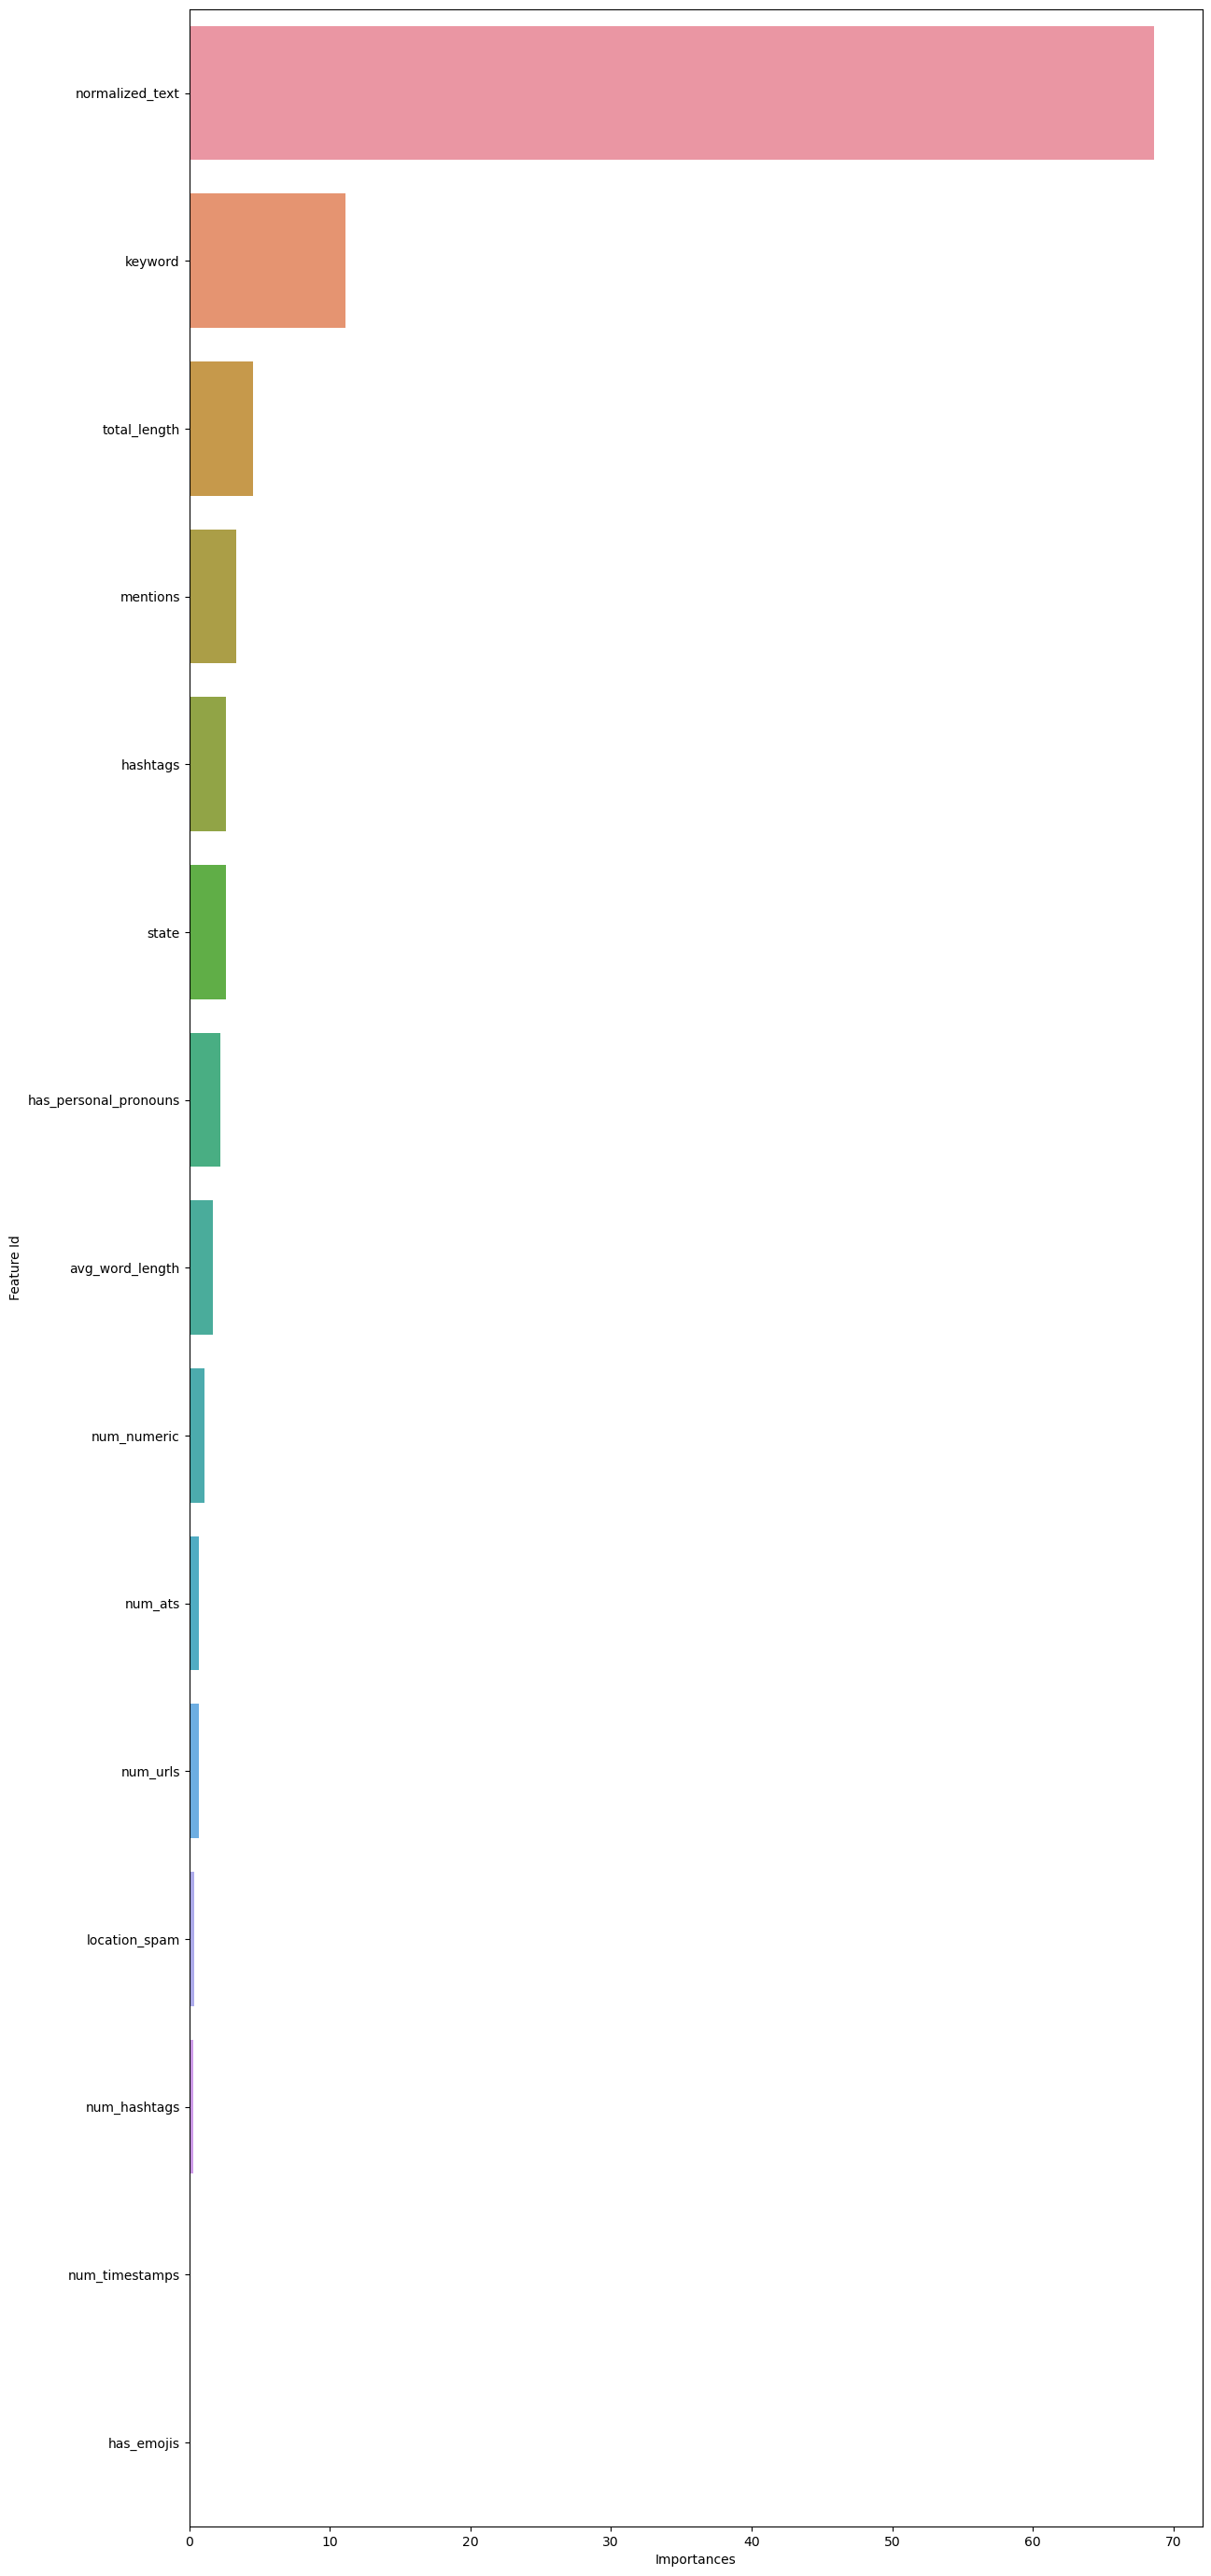

In [22]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

plt.figure(figsize=(14, 35))
_ = sns.barplot(x="Importances", y="Feature Id", data=best_model.get_feature_importance(prettified=True))

In [23]:
import numpy as np
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

In [24]:
#calculate Matthews correlation coefficient
matthews_corrcoef(y_valid, train_predictions)

0.6586715713113872

In [25]:
roc = roc_auc_score(y_valid, train_predictions)
print('ROC: %.3f' % roc)

ROC: 0.821


In [26]:
actual_values = y_valid.tolist()

In [27]:
input_data = x_valid_features
predicted_values = model.predict(input_data)

In [28]:
df = pd.DataFrame(columns=['Actual', 'Predicted'])
for actual, predicted in zip(actual_values, predicted_values):
    df = df.append({'Actual': actual, 'Predicted': predicted}, ignore_index=True)
print(df)

     Actual Predicted
0         1         1
1         1         1
2         1         1
3         0         0
4         0         0
...     ...       ...
1492      1         0
1493      0         0
1494      1         1
1495      0         0
1496      1         1

[1497 rows x 2 columns]


In [29]:
df.to_excel("D:\\CatBoost Results.xlsx", index=False)